## Sysbench analysis

In [73]:
# importing packages

import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [74]:
# dataframes initialization

csv_folder = "../csv"
c1_np_file_path = f"{csv_folder}/sysbench_test-c1.csv"
c1_p_file_path = f"{csv_folder}/sysbench_test-c1-pinning.csv"
c2_np_file_path = f"{csv_folder}/sysbench_test-c2.csv"
c2_p_file_path = f"{csv_folder}/sysbench_test-c2-pinning.csv"
vm1_file_path = f"{csv_folder}/sysbench_test-vm1.csv"
vm2_file_path = f"{csv_folder}/sysbench_test-vm2.csv"

c1_np_df = pd.read_csv(c1_np_file_path)
c1_p_df = pd.read_csv(c1_p_file_path)
c2_np_df = pd.read_csv(c2_np_file_path)
c2_p_df = pd.read_csv(c2_p_file_path)
vm1_df = pd.read_csv(vm1_file_path)
vm2_np_df = pd.read_csv(vm2_file_path)

c1_np_df = c1_np_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])
c1_p_df = c1_p_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])
c2_np_df = c2_np_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])
c2_p_df = c2_p_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])
vm1_df = vm1_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])
vm2_df = vm2_np_df.drop(columns=['Run', 'Memory_total_size', 'Memory_operation', 'Memory_scope'])


c1_np_df = c1_np_df.mean()
c1_p_df = c1_p_df.mean()
c2_np_df = c2_np_df.mean()
c2_p_df = c2_p_df.mean()
vm1_df = vm1_df.mean()
vm2_df = vm2_df.mean()

# Convert CPU_events_per_sec to thousands
c1_np_df['CPU_events_per_sec'] /= 1000
c1_p_df['CPU_events_per_sec'] /= 1000
c2_np_df['CPU_events_per_sec'] /= 1000
c2_p_df['CPU_events_per_sec'] /= 1000
vm1_df['CPU_events_per_sec'] /= 1000
vm2_df['CPU_events_per_sec'] /= 1000

In [75]:
c1_np_df.head()

CPU_events_per_sec        1.62934
CPU_total_time           10.00204
CPU_total_events      16297.60000
CPU_latency_min           2.32200
CPU_latency_avg           2.45600
dtype: float64

## Comparison

In [76]:
# Select the metrics to plot
metrics = ['CPU_events_per_sec', 'CPU_latency_avg', 'Memory_total_time', 'Memory_latency_avg']
metrics_label = ['CPU events/s', 'CPU latency (ms)', 'MEMORY total time(s)', 'MEMORY latency(ms)']

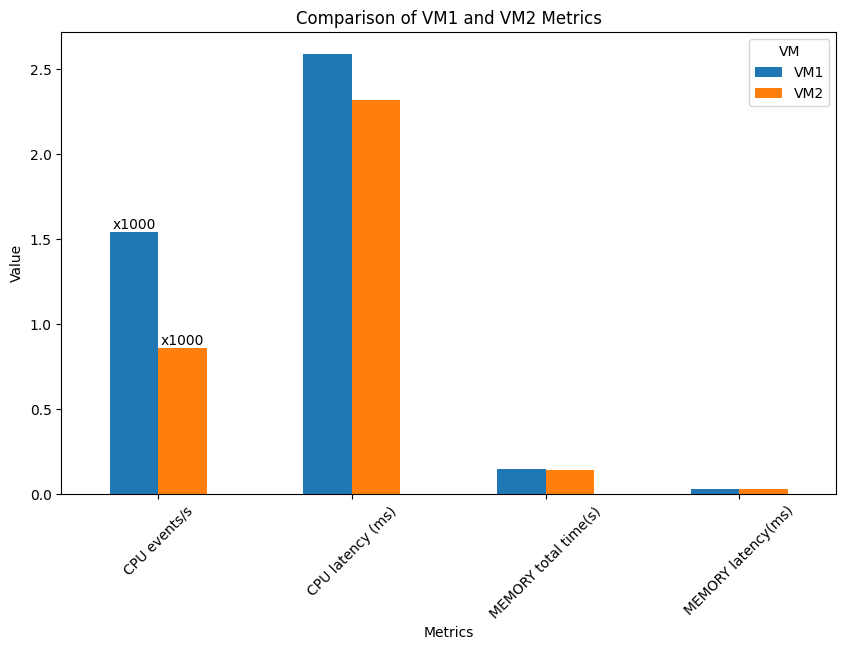

In [77]:
# Create a dataframe with the selected metrics for vm1 and vm2
data = {
  'Metric': metrics,
  'VM1': [vm1_df[metric] for metric in metrics],
  'VM2': [vm2_df[metric] for metric in metrics]
}

plot_df = pd.DataFrame(data)

# Plot the data
plot_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
for i, bar in enumerate(plt.gca().patches):
  metric = metrics[i % len(metrics)]
  if metric == 'CPU_events_per_sec':
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 'x1000', ha='center', va='bottom')
plt.title('Comparison of VM1 and VM2 Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='VM')
plt.xticks(ticks=range(len(metrics)), labels=metrics_label, rotation=45)
plt.show()

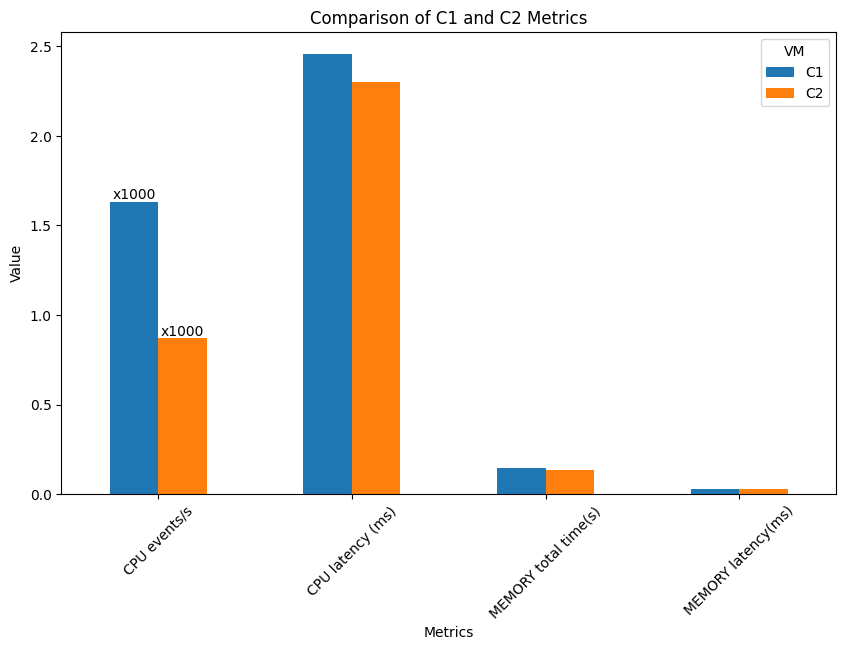

In [78]:
# Create a dataframe with the selected metrics for vm1 and vm2
data = {
  'Metric': metrics,
  'C1': [c1_np_df[metric] for metric in metrics],
  'C2': [c2_np_df[metric] for metric in metrics]
}

plot_df = pd.DataFrame(data)

# Plot the data
plot_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
for i, bar in enumerate(plt.gca().patches):
  metric = metrics[i % len(metrics)]
  if metric == 'CPU_events_per_sec':
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 'x1000', ha='center', va='bottom')
plt.title('Comparison of C1 and C2 Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='VM')
plt.xticks(ticks=range(len(metrics)), labels=metrics_label, rotation=45)
plt.show()

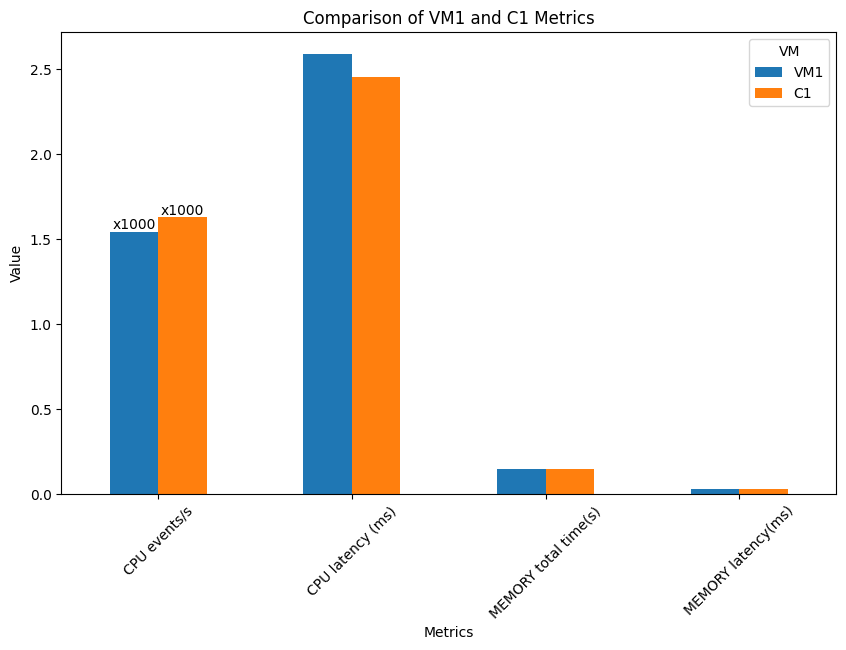

In [79]:
# Create a dataframe with the selected metrics for vm1 and vm2
data = {
  'Metric': metrics,
  'VM1': [vm1_df[metric] for metric in metrics],
  'C1': [c1_np_df[metric] for metric in metrics]
}

plot_df = pd.DataFrame(data)

# Plot the data
plot_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
for i, bar in enumerate(plt.gca().patches):
  metric = metrics[i % len(metrics)]
  if metric == 'CPU_events_per_sec':
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 'x1000', ha='center', va='bottom')
plt.title('Comparison of VM1 and C1 Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='VM')
plt.xticks(ticks=range(len(metrics)), labels=metrics_label, rotation=45)
plt.show()

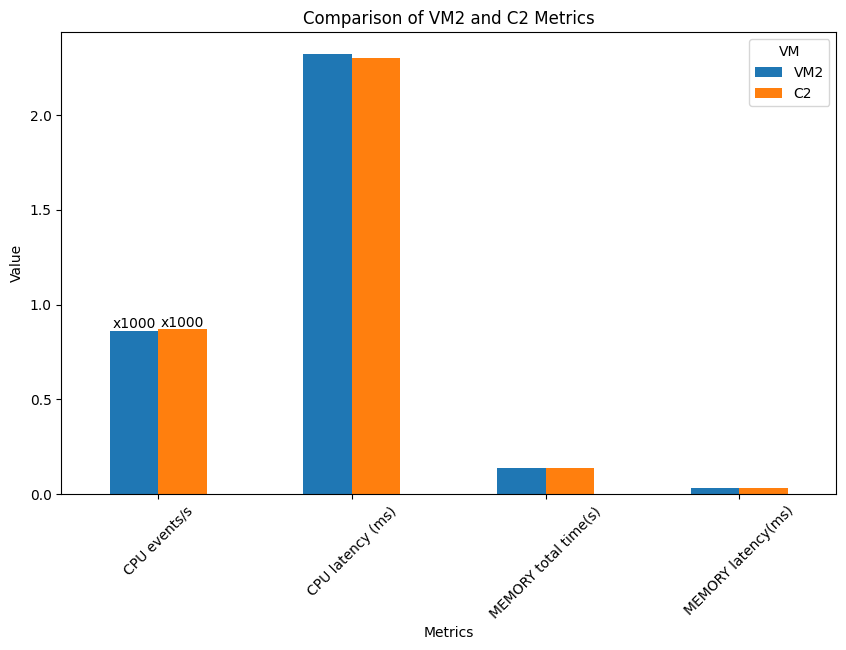

In [80]:
# Create a dataframe with the selected metrics for vm1 and vm2
data = {
  'Metric': metrics,
  'VM2': [vm2_df[metric] for metric in metrics],
  'C2': [c2_np_df[metric] for metric in metrics]
}

plot_df = pd.DataFrame(data)

# Plot the data
plot_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
for i, bar in enumerate(plt.gca().patches):
  metric = metrics[i % len(metrics)]
  if metric == 'CPU_events_per_sec':
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 'x1000', ha='center', va='bottom')
plt.title('Comparison of VM2 and C2 Metrics')
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='VM')
plt.xticks(ticks=range(len(metrics)), labels=metrics_label, rotation=45)
plt.show()